### This file looks at identifying which variables are important and which are not, through doing the following:
### 1. Selecting most important feature using a tree classifer algorithm
### 2. Creating a heat map, by finding the correlation between each variable
### 3. Creating a descriptive summary, by peforming an ordinary lease sqaure regresion on the untrained data

In [1]:
# import external modules
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import local modules.e
from utils import data_loader


In [2]:
# define constants.
DATASET_2019_FILEPATH = r'./data/dataset_aggregate_sum.csv'  # dataset from https://www.sciencedirect.com/science/article/pii/S235234091931042X

# reading the ex
data = pd.read_csv(DATASET_2019_FILEPATH)
                   
# strip any observation with incomplete data.
data.dropna(how='any', inplace=True)

# drop unnecessary values.
data.pop('project')
data.pop('release')
data.pop('maven_release')

import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling ReportV2")
profile.to_widgets()




# separate into train and test datasets.
#train_x = complete_dataset.sample(frac=0.8,random_state=0)
#test_x = complete_dataset.drop(train_x.index)   # remove all training observations.

# split x and y values.
#train_y = train_x.pop('mavern_reuse')
#test_y = test_x.pop('mavern_reuse')

[0.03201322 0.02299369 0.02370497 0.03421106 0.04207698 0.06663424
 0.04816073 0.03608873 0.0380565  0.04398689 0.04609764 0.04675352
 0.03397482 0.03210942 0.03787386 0.03243215 0.03299281 0.03519695
 0.03795863 0.03610081 0.0338797  0.03390111 0.03511905 0.03341485
 0.03436728 0.0328588  0.0370416 ]


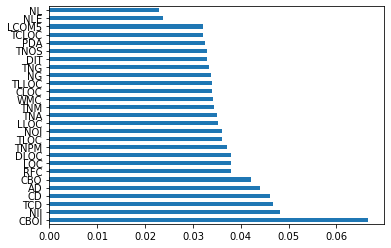

In [13]:
# Reference to the library used: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
# Selecting the most important features using a tress classifer algorithm
model = ExtraTreesClassifier()

# building of a forest of tress based on the the untrained data set
model.fit(X,y)

# uses an inbuilt class feature_importances of tree based classifiers - 
# which selects the most important features based on gini importance/ mean decrease impurity 
# in more laymen terms: along the lines of the less probability/ samples that read that particular node/ variable -> 
# the less important that variable is 
print(model.feature_importances_) 

#plot a bar graph of feature importances - selecting all the features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

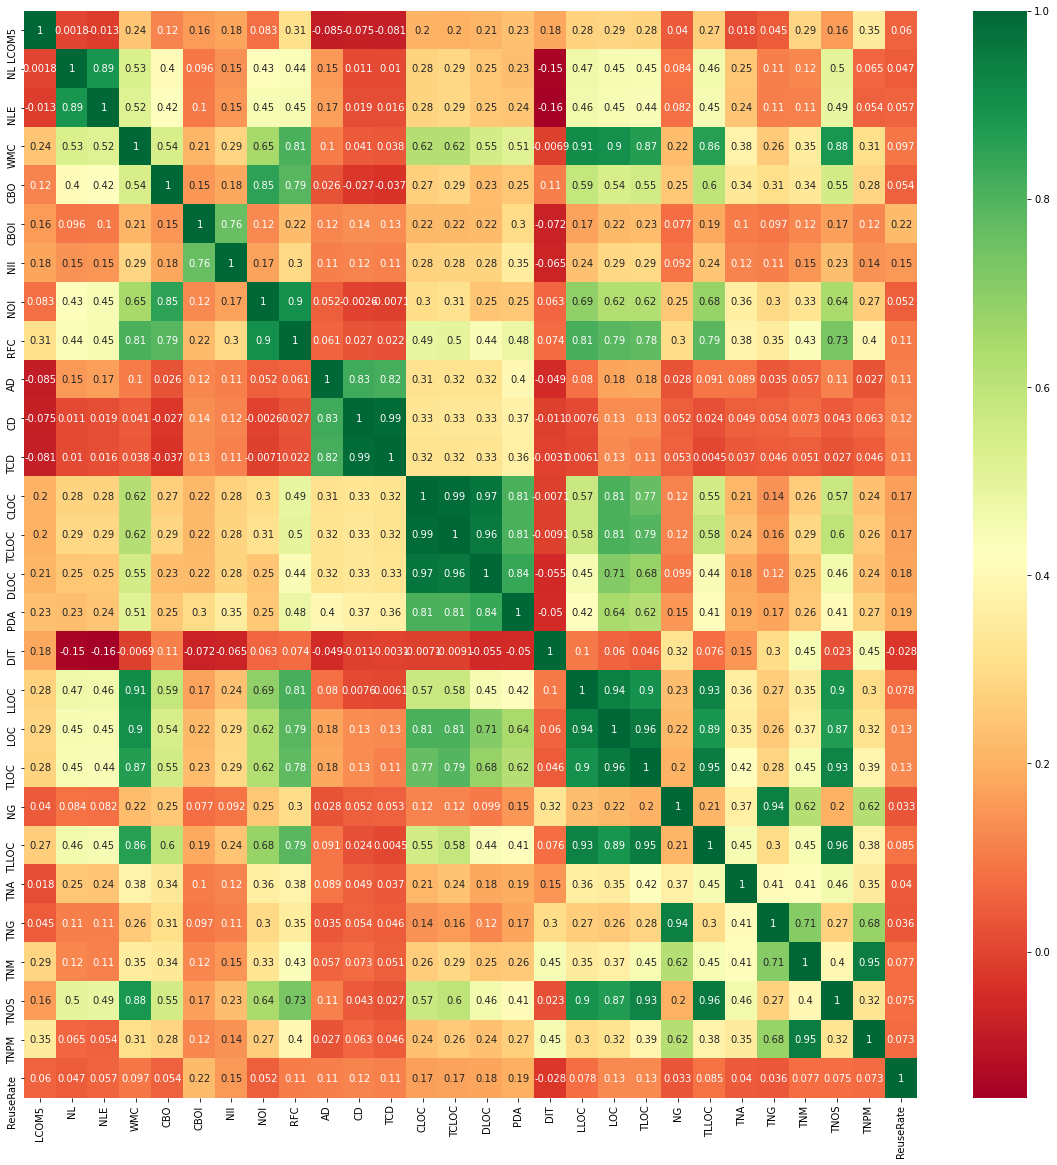

In [14]:
# Creating a heatmap - to find the correlation between each variable 
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
None

Epoch: 0, loss:3831.8477,  mae:16.6641,  mse:3831.8477,  val_loss:760.7765,  val_mae:10.4351,  val_mse:760.7765,  
....................................................................................................
 Testing set Mean Squared Error: 1656.86
                                 OLS Regression Results                                
Dep. Variable:              ReuseRate   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              69.97
Date:                Thu, 27 Aug 2020  

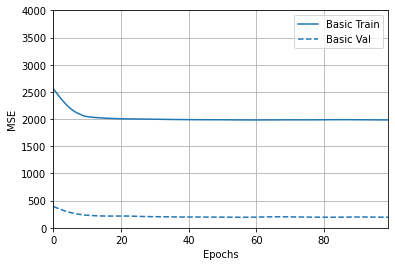

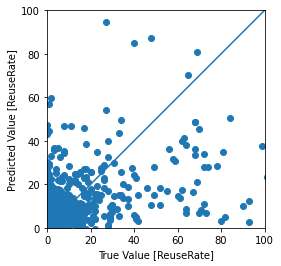

In [15]:
# to get the input variables to run the linear regression model
(train_x, test_x, train_y, test_y) = data_loader.load_2019_dataset()

# running the linear regression model -> ideally we shouldn't be printing all of the info here 
basic_regression.regression_2019()

# OLS Regression on the whole data set/ data that has not been trained yet
est = sm.OLS(train_y, train_x)
est2 = est.fit()

# printing out the summary description 
print(est2.summary())

In [16]:
# OLS Regression on the whole data set/ data that has not been trained yet
est = sm.OLS(y, X)

# fitting the model
est2 = est.fit()

# printing a sumarry of the statistics - looking at p value here in particular 
print(est2.summary())



                                 OLS Regression Results                                
Dep. Variable:              ReuseRate   R-squared (uncentered):                   0.086
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              86.12
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:43:03   Log-Likelihood:                     -1.2676e+05
No. Observations:               24794   AIC:                                  2.536e+05
Df Residuals:                   24767   BIC:                                  2.538e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import pandas as pd
    import numpy as np
    from sklearn import datasets
    